In [1]:
%pip install numpy matplotlib ipympl
%matplotlib widget


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def LinearAutocorrelation(buffer, w, tau):
    result = 0
    for i in range(0, w):
        result += buffer[i]*buffer[i+tau]
    return result

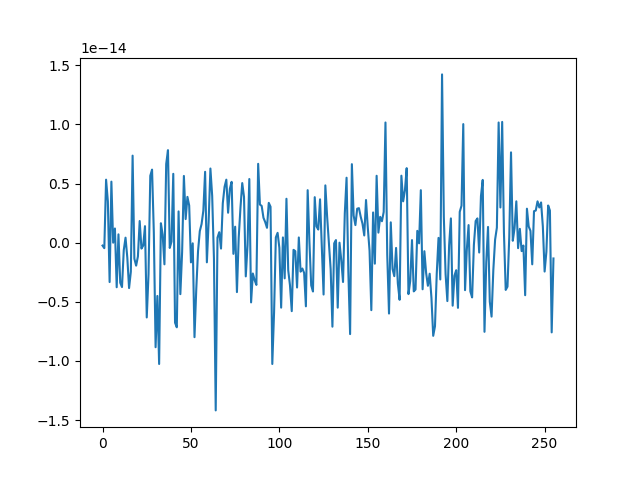

In [4]:
x = np.random.normal(0, 1, 256)
r_x = []

window_size = int(len(x)/2)
for delta in range(0, window_size-1):
    r_x.append(LinearAutocorrelation(x, window_size, delta))

with open("x_c_array.txt", "w") as f:
    f.write("{\n")
    for value in x:
        f.write(f"    {value:.9f},\n")
    f.write("};\n")

X = np.fft.fft(x)
r_x2 = np.fft.ifft(X*np.conj(X))

plt.figure()
plt.plot(r_x2.imag)
#plt.plot(r_x)




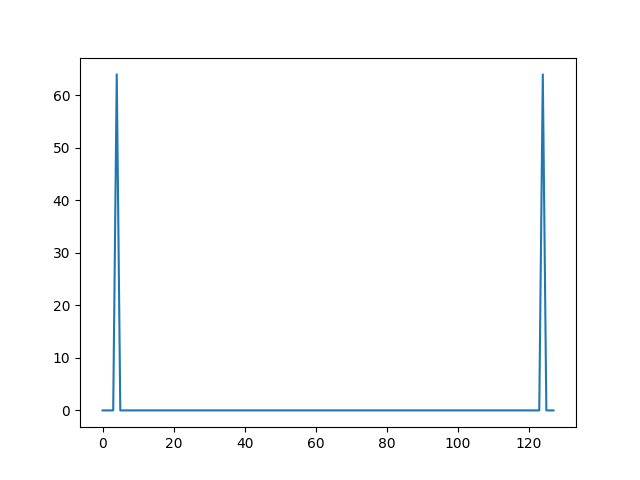

In [5]:
BUFFER_SIZE = 128
bufferIn = []
for i in range(0, BUFFER_SIZE):
    bufferIn.append(np.sin(2*np.pi*i/(float)(BUFFER_SIZE/4)))

plt.figure()
fft = np.fft.fft(bufferIn, n=BUFFER_SIZE)
plt.plot(np.abs(fft))

In [6]:
import math

LUT_SIZE = 1024  # Change this to 256, 512, 2048, etc.
OUTPUT_FILE = "lut_tables.h"


def generate_lut():
    sin_vals = []
    cos_vals = []

    for i in range(LUT_SIZE):
        angle = 2.0 * math.pi * i / LUT_SIZE
        sin_vals.append(math.sin(angle))
        cos_vals.append(math.cos(angle))

    return sin_vals, cos_vals


def c_array(name, values):
    lines = []
    lines.append(f"static const float {name}[{len(values)}] = {{")
    for v in values:
        lines.append(f"    {v:.8f}f,")
    lines.append("};\n")
    return "\n".join(lines)


def save_to_file(filename, sin_lut, cos_lut):
    with open(filename, "w") as f:
        f.write("// Auto-generated LUT tables\n\n")
        f.write(f"#define LUT_SIZE {LUT_SIZE}\n\n")
        f.write(c_array("sin_lut", sin_lut))
        f.write(c_array("cos_lut", cos_lut))


if __name__ == "__main__":
    sin_lut, cos_lut = generate_lut()
    save_to_file(OUTPUT_FILE, sin_lut, cos_lut)
    print(f"LUT tables saved to {OUTPUT_FILE}")

LUT tables saved to lut_tables.h
